In [1]:
import polars as pl
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt

In [6]:
data_dir = Path('/iblm/netapp/data4/dlaub/projects/hyena-dna/data/cactus_genomes')

In [8]:
%%bash -s "$data_dir"
bat $1/zoonomia_mam_files/meta_data/ncbi/*.json $1/primates/meta_data/md_json/*.json \
    | jq -sr '["accession", "n50"] as $cols
        | map([.reports[0].accession, .reports[0].assembly_stats.contig_n50]) as $rows
        | $cols, $rows[]
        | @csv' \
    > $1/n50.csv

In [8]:
cactus = pl.read_csv(data_dir / 'n50.csv')
cactus.head()

accession,n50
str,i64
"""GCA_000002285.…",27487084
"""GCA_000164785.…",64490
"""GCA_000247795.…",28375
"""GCA_000465285.…",12668
"""GCA_000465405.…",9502


In [3]:
vgp = pl.read_csv('/iblm/netapp/data4/shared_dir/hyena_dna_collab/vertebrate_genomes_project/genomes_list/vertebrate.genome.minimum1-1Mb.xenoRef.metadata', separator='\t')
vgp.head()

acc,assembly_name,common_name,science_name,tax_id,n_1mb_regions,assembly_level,contig_n50,genome_coverage,bioproject_accession,multiple_genomes_for_species
str,str,str,str,i64,i64,str,i64,f64,str,bool
"""GCA_009769605.…","""bBucAby1.pri""","""Abyssinian gro…","""Bucorvus abyss…",153643,1052,"""Chromosome""",12039478,66.0,"""PRJNA561887""",true
"""GCF_027172205.…","""rPodRaf1.pri""","""Aeolian wall l…","""Podarcis raffo…",65483,1434,"""Chromosome""",61439401,31.0,"""PRJNA839511""",false
"""GCA_030014295.…","""mLoxAfr1.hap2""","""African savann…","""Loxodonta afri…",9785,3189,"""Chromosome""",82653632,43.0,"""PRJNA924322""",true
"""GCA_009819775.…","""bPhoRub2.pri""",null,"""Phoenicopterus…",9218,1165,"""Chromosome""",14700712,61.3,"""PRJNA561888""",true
"""GCF_018492685.…","""fAloSap1.pri""","""American shad""","""Alosa sapidiss…",34773,843,"""Chromosome""",1565278,33.0,"""PRJNA728145""",false


In [12]:
n50 = pl.concat(
    [
        cactus.with_columns(dataset=pl.lit("cactus")),
        vgp.select("acc", "contig_n50")
        .rename({"acc": "accession", "contig_n50": "n50"})
        .with_columns(dataset=pl.lit("vgp")),
    ]
)
n50.head()

accession,n50,dataset
str,i64,str
"""GCA_000002285.…",27487084,"""cactus"""
"""GCA_000164785.…",64490,"""cactus"""
"""GCA_000247795.…",28375,"""cactus"""
"""GCA_000465285.…",12668,"""cactus"""
"""GCA_000465405.…",9502,"""cactus"""


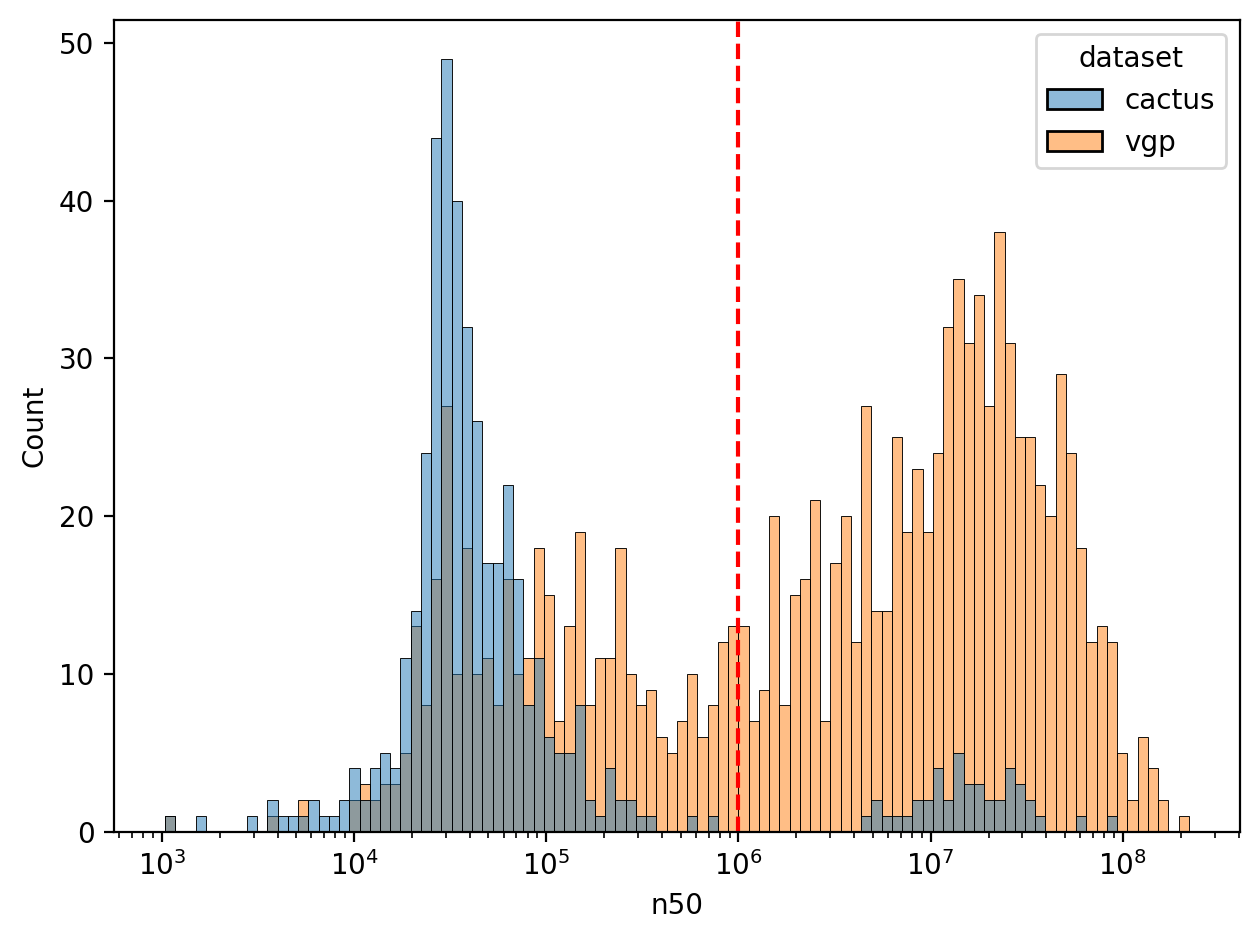

In [17]:
fig, ax = plt.subplots(dpi=200)
sns.histplot(n50, x='n50', hue='dataset', log_scale=True, ax=ax, bins=100)
ax.axvline(1e6, color='red', linestyle='--')
fig.tight_layout();

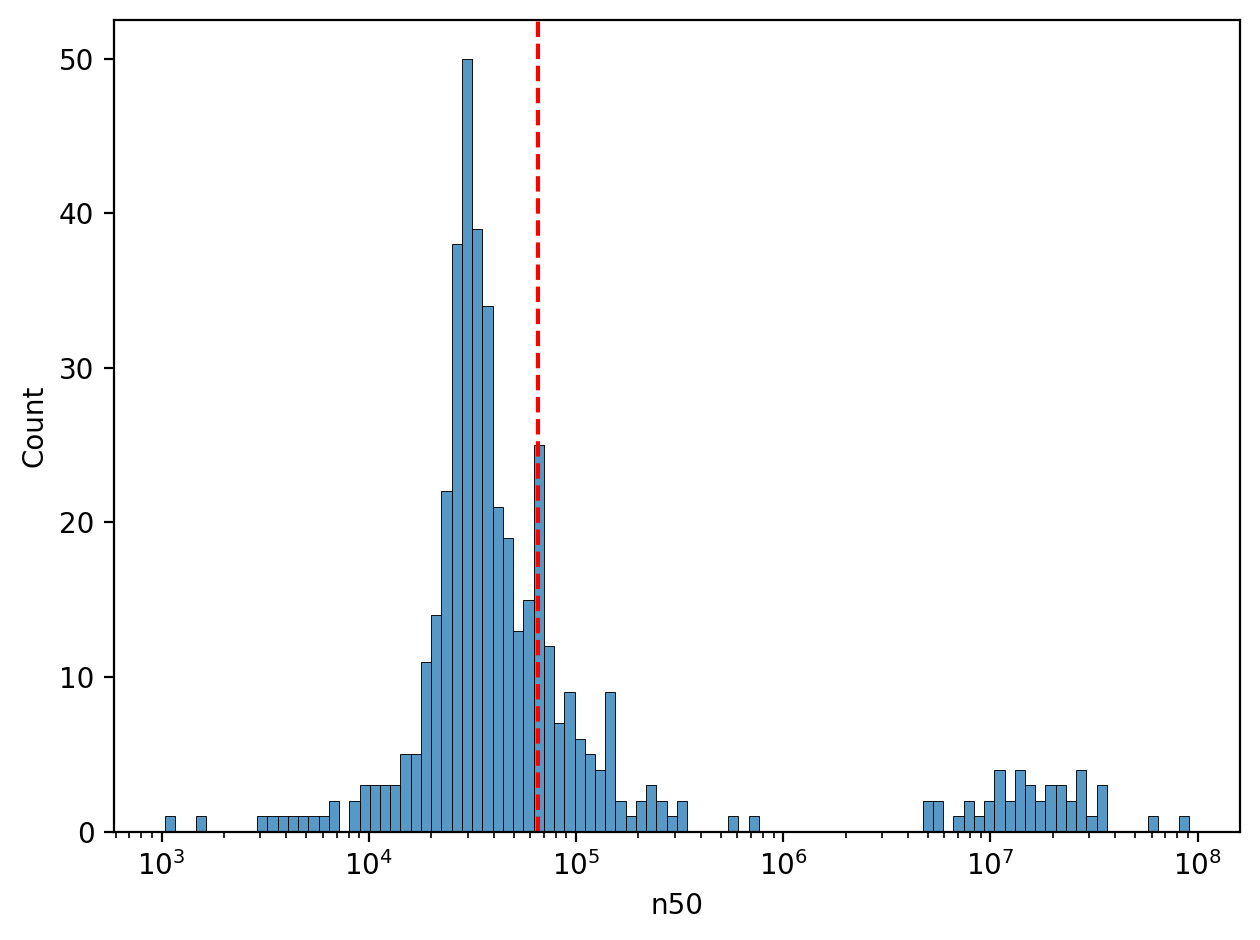

In [22]:
fig, ax = plt.subplots(dpi=200)
sns.histplot(n50.filter(pl.col('dataset') == 'cactus'), x='n50', log_scale=True, ax=ax, bins=100)
ax.axvline(2**16, color='red', linestyle='--')
fig.tight_layout();